In [10]:
import networkx as nx
# To visualize in jupyter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from collections import defaultdict

## Star Wars Network
- Construct Network by using Starwars scripts.
- All scripts are come from [Internet Movie Script Database (IMSDb)](http://www.imsdb.com/).
- We use the prequal trilogy scripts (Episode 1~3)

Read data

In [6]:
# encoding="utf8" used to avoid error in actor name
ep1 = pd.read_csv('StarWars_ep1.csv',encoding="utf8") # Episode I   - The Phantom Menace
ep2 = pd.read_csv('StarWars_ep2.csv',encoding="utf8") # Episode II  - Attack of the Clones
ep3 = pd.read_csv('StarWars_ep3.csv',encoding="utf8") # Episode III - Revenge of the Sith

In [7]:
ep2[:10]

,episode,scene_num,sequence,place,type,actor,dialogue
0,2,2,1,CORUSCANT,EXT,PADMÉ,Cordé...
1,2,2,2,CORUSCANT,EXT,CORDÉ,"... I'm sorry, m'lady... I'm... not sure I..."
2,2,2,3,CORUSCANT,EXT,AMIDALA,No!... No!... No!...
3,2,2,4,CORUSCANT,EXT,AMIDALA,I should not have come back.
4,2,2,5,CORUSCANT,EXT,CAPTAIN TYPHO,"M'Lady, you are still in danger."
5,2,2,6,CORUSCANT,EXT,CAPTAIN TYPHO,This vote is very important. You did your duty...
6,2,4,7,SENATE CHAMBER,INT,MAS AMEDDA,Order! We shall have order! The motion for the...
7,2,4,8,SENATE CHAMBER,INT,PALPATINE,"...My esteemed colleagues, excuse me... I have..."
8,2,4,9,SENATE CHAMBER,INT,PALPATINE,This grievous blow is especially personal to m...
9,2,4,10,SENATE CHAMBER,INT,SENATOR ASK AAK,How many more Senators will die before this ci...


In [8]:
# Marge dataframe
pre_df = pd.concat([ep1,ep2,ep3],ignore_index=True)

### Construct Network
 - To construct Network, we should define __*Node*__ and __*Edge*__
 - In Movie script, we can simply consider _Actor_ and _Place_ as _Node_
 - Here is no inherent criterion (_Edge_) when we should regard two nodes in a network as related. 
 - There are different approaches to this, one of the simplest being __*co-occurrence*__.
 
##### Actor-Place network
- Node : Actor, Place
- Edge : actor with place

##### Actor- Actor Network
- Node : Actor
- Edge : Co-occurrence in the same scene

In [22]:
# Actor-Place Network
def ActorPlaceNetwork(df,min_node=0,min_edge=0):
    # The argument to defaultdict is a function (or rather, a callable object) that returns the default value. 
    # key value 가 없으면 0이 default 값으로 지정
    edges = defaultdict(int)
    nodes = defaultdict(int)
    # Construct Node and edge lists with weights
    for idx,row in df.iterrows():
        edges[(row['actor'],row['place'])] += 1
        nodes[row['actor']] += 1
        nodes[row['place']] += 1
    # filltering
    # weight 가 미리 지정한 min 이하인 것들 제거
    nodes = { n:v for (n,v) in nodes.items() if v>min_node } 
    edges = { (n1,n2):v for ((n1,n2),v) in edges.items() if v>min_edge } 
    return (nodes, edges) 

## Visualization
### Actor-Place Network 

In [46]:
min_edge = 15
(nodes,edges) = ActorPlaceNetwork(pre_df,min_node=100,min_edge=min_edge)
G = nx.Graph()
G.add_nodes_from(nodes.keys())
nx.set_node_attributes(G,nodes,'weight')
G.add_edges_from(edges.keys())
nx.set_edge_attributes(G,edges,'weight')

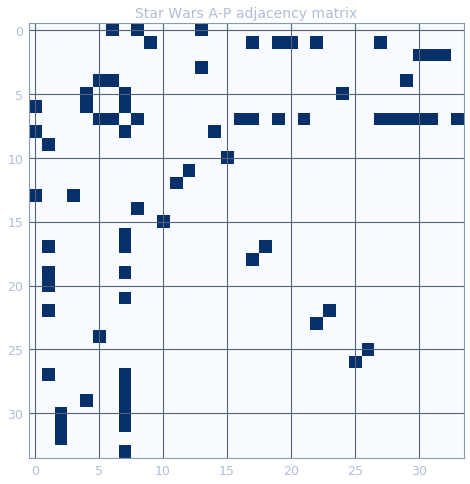

In [44]:
#show adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool)#adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Blues",# color map
           interpolation="none"
           )
plt.title('Star Wars A-P adjacency matrix', fontsize=14);

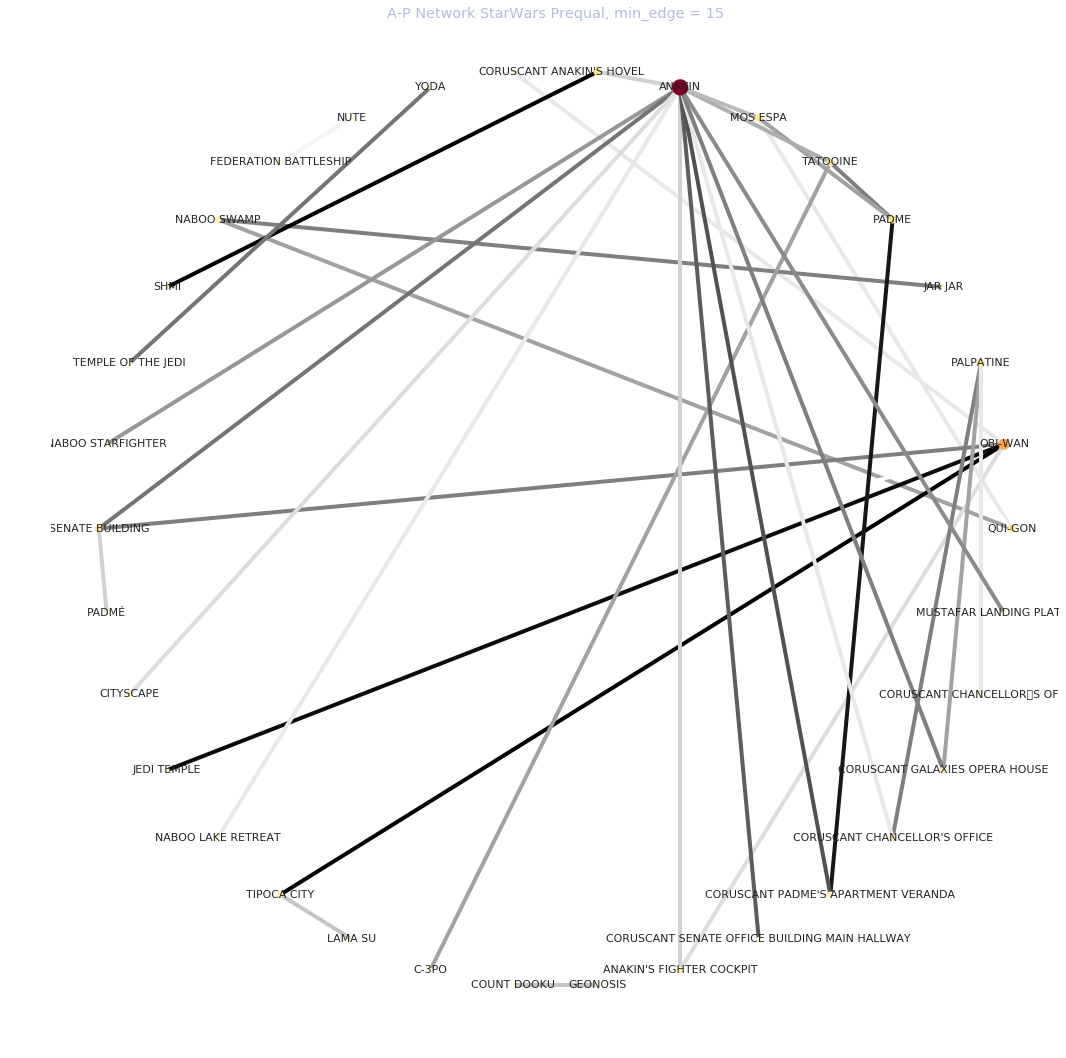

In [48]:
dig = dict(nx.degree(G)) # degree of network
pos=nx.circular_layout(G) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = [d*20 for d in dig.values()] # node size
        ,node_color=list(dig.values()) # data for label color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
        ,edge_color=list(edges.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )
plt.title('A-P Network StarWars Prequal, min_edge = '+ str(min_edge));
plt.savefig('AP_Network.png', format="PNG") # Save figure

요다는 temple of Jedi에 많이 나온다

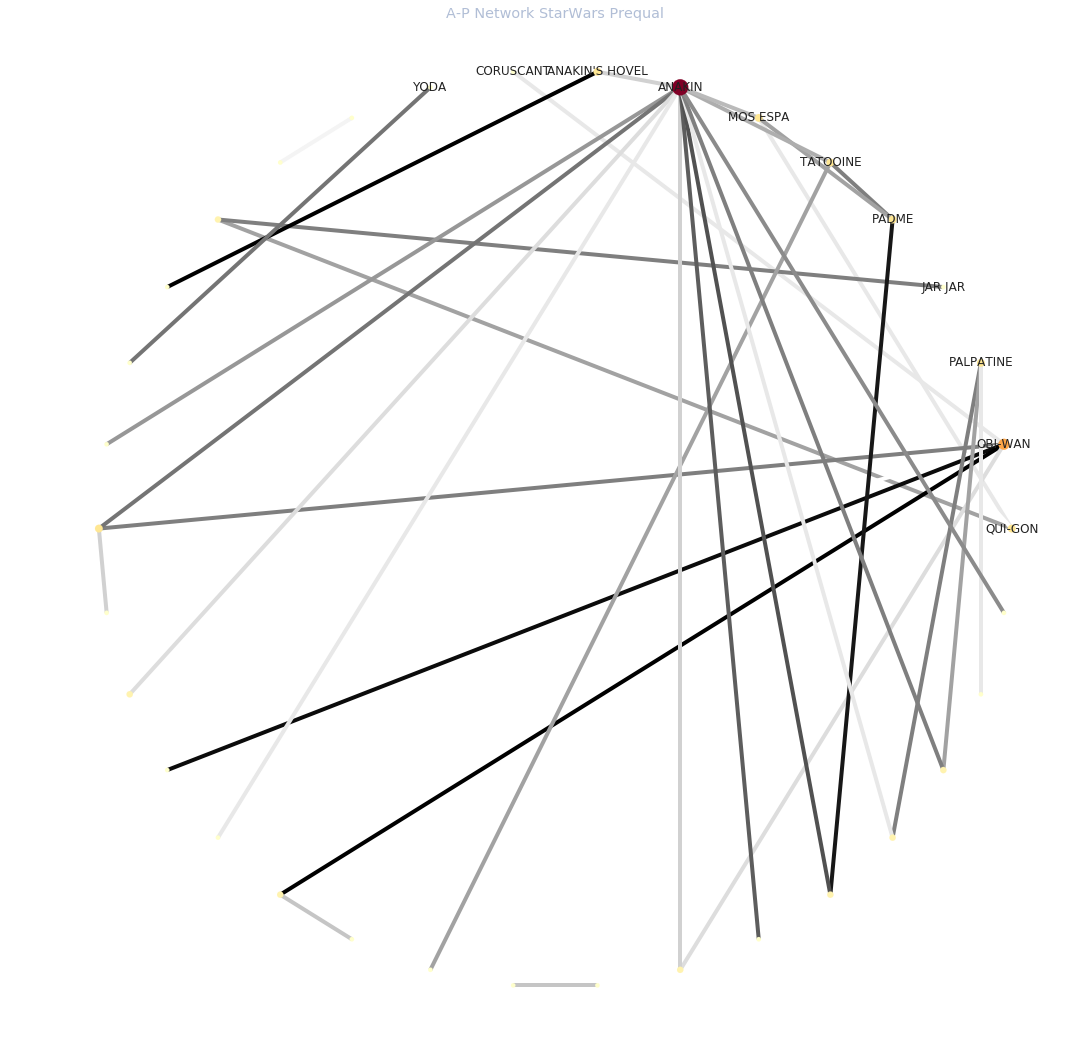

In [52]:
dig = dict(nx.degree(G)) # degree of network
pos=nx.circular_layout(G) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=False
        ,node_size = [d*20 for d in dig.values()] # node size
        ,node_color=list(dig.values()) # data for label color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
        ,edge_color=list(edges.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )

#filtering labels
min_disp = 5;
labels={}
for n,v in nodes.items():
    if v > min_disp:
        labels[n]= n;
    else:
        labels[n]= ''
nx.draw_networkx_labels(G,pos,labels,font_size=12);

plt.title('A-P Network StarWars Prequal');
plt.savefig('AP_Network.png', format="PNG") # Save figure


In [58]:
from itertools import combinations # To use combination
list(combinations(range(5),2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Actor-Actor Network 

In [81]:
# Actor-Actor network
def ActorNetwork(ds,min_node=0,min_edge=0):
    from itertools import combinations # To use combination
    from collections import defaultdict
    edges = defaultdict(int)
    nodes = defaultdict(int)
    for ii in set(ds['scene_num']):
        act=ds[ds['scene_num']==ii]['actor']
        act=set(act) # 중복되는 것들 제거
        for (n1,n2) in list(combinations(act,2)):
            edges[(n1,n2)] += 1 # weight 부여
            nodes[n1] += 1
            nodes[n2] += 1
    # filltering
    nodes = { n:v for (n,v) in nodes.items() if v>min_node }
    edges = { (n1,n2):v for ((n1,n2),v) in edges.items() if v>min_edge }
    return (nodes, edges) 

In [82]:
(nodes,edges) = ActorNetwork(pre_df,min_node=10,min_edge=1)
G = nx.Graph()
G.add_nodes_from(nodes.keys())
nx.set_node_attributes(G,nodes,'weight')
G.add_edges_from(edges.keys())
nx.set_edge_attributes(G,edges,'weight')

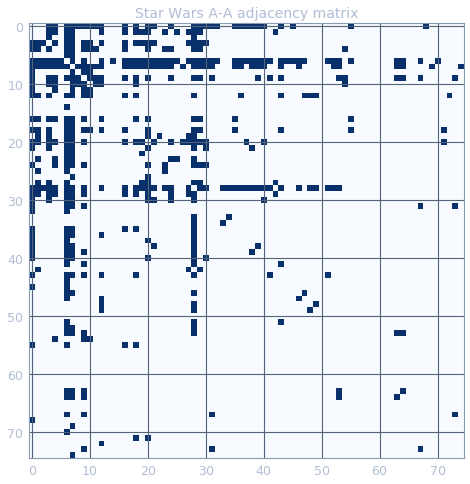

In [83]:
#show adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool)#adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Blues",# color map
           interpolation="none"
           )
plt.title('Star Wars A-A adjacency matrix', fontsize=14);

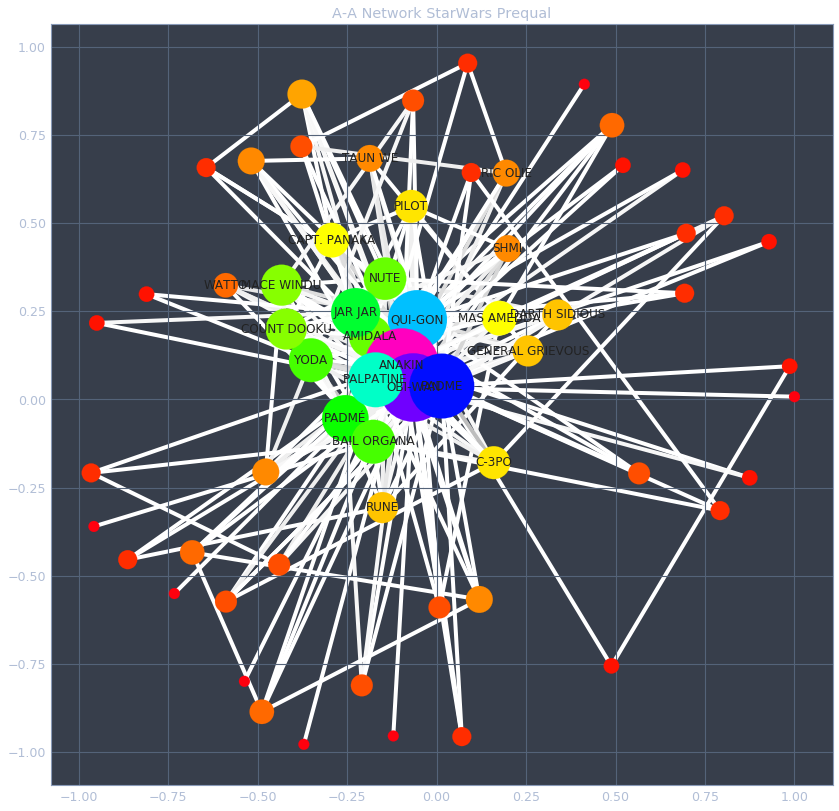

In [85]:
dig = dict(nx.degree(G)) # degree of network
# pos=nx.spring_layout(G,k=1.5) # positions for all nodes
pos=nx.spring_layout(G,k=1.5) # positions for all nodes

plt.figure(figsize=(14,14)) #Control figure size
nx.draw_networkx_nodes(G,pos,with_labels=False
        ,node_size = [d*120 for d in dig.values()] # node size
        ,node_color=list(dig.values()) # data for label color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.gist_rainbow # color_map
       )
nx.draw_networkx_edges(G,pos
         ,edgelist=list(edges.keys())
        ,edge_color=list(edges.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
                     )
#filtering labels
min_disp = 30;
labels={}
for n,v in nodes.items():
    if v > min_disp:
        labels[n]= n;
    else:
        labels[n]= ''
nx.draw_networkx_labels(G,pos,labels,font_size=12);

plt.title('A-A Network StarWars Prequal');
plt.savefig('AA_Network.png', format="PNG") # Save figure